## Assignment 5 - Helper Functions

In [3]:
%pylab inline

# (c) 2014 Reid Johnson and Everaldo Aguiar
#
# Functions to work with continuous data and linear regression models.

import matplotlib.pyplot as pl

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                #t = plt.title(name)
            i += 1

    pl.show()

Populating the interactive namespace from numpy and matplotlib


In [4]:
import pandas as pd
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species'], header=None)
iris = iris.dropna()

** Plot 1, Scatterplot matrix representing each pairwise combination of features. **

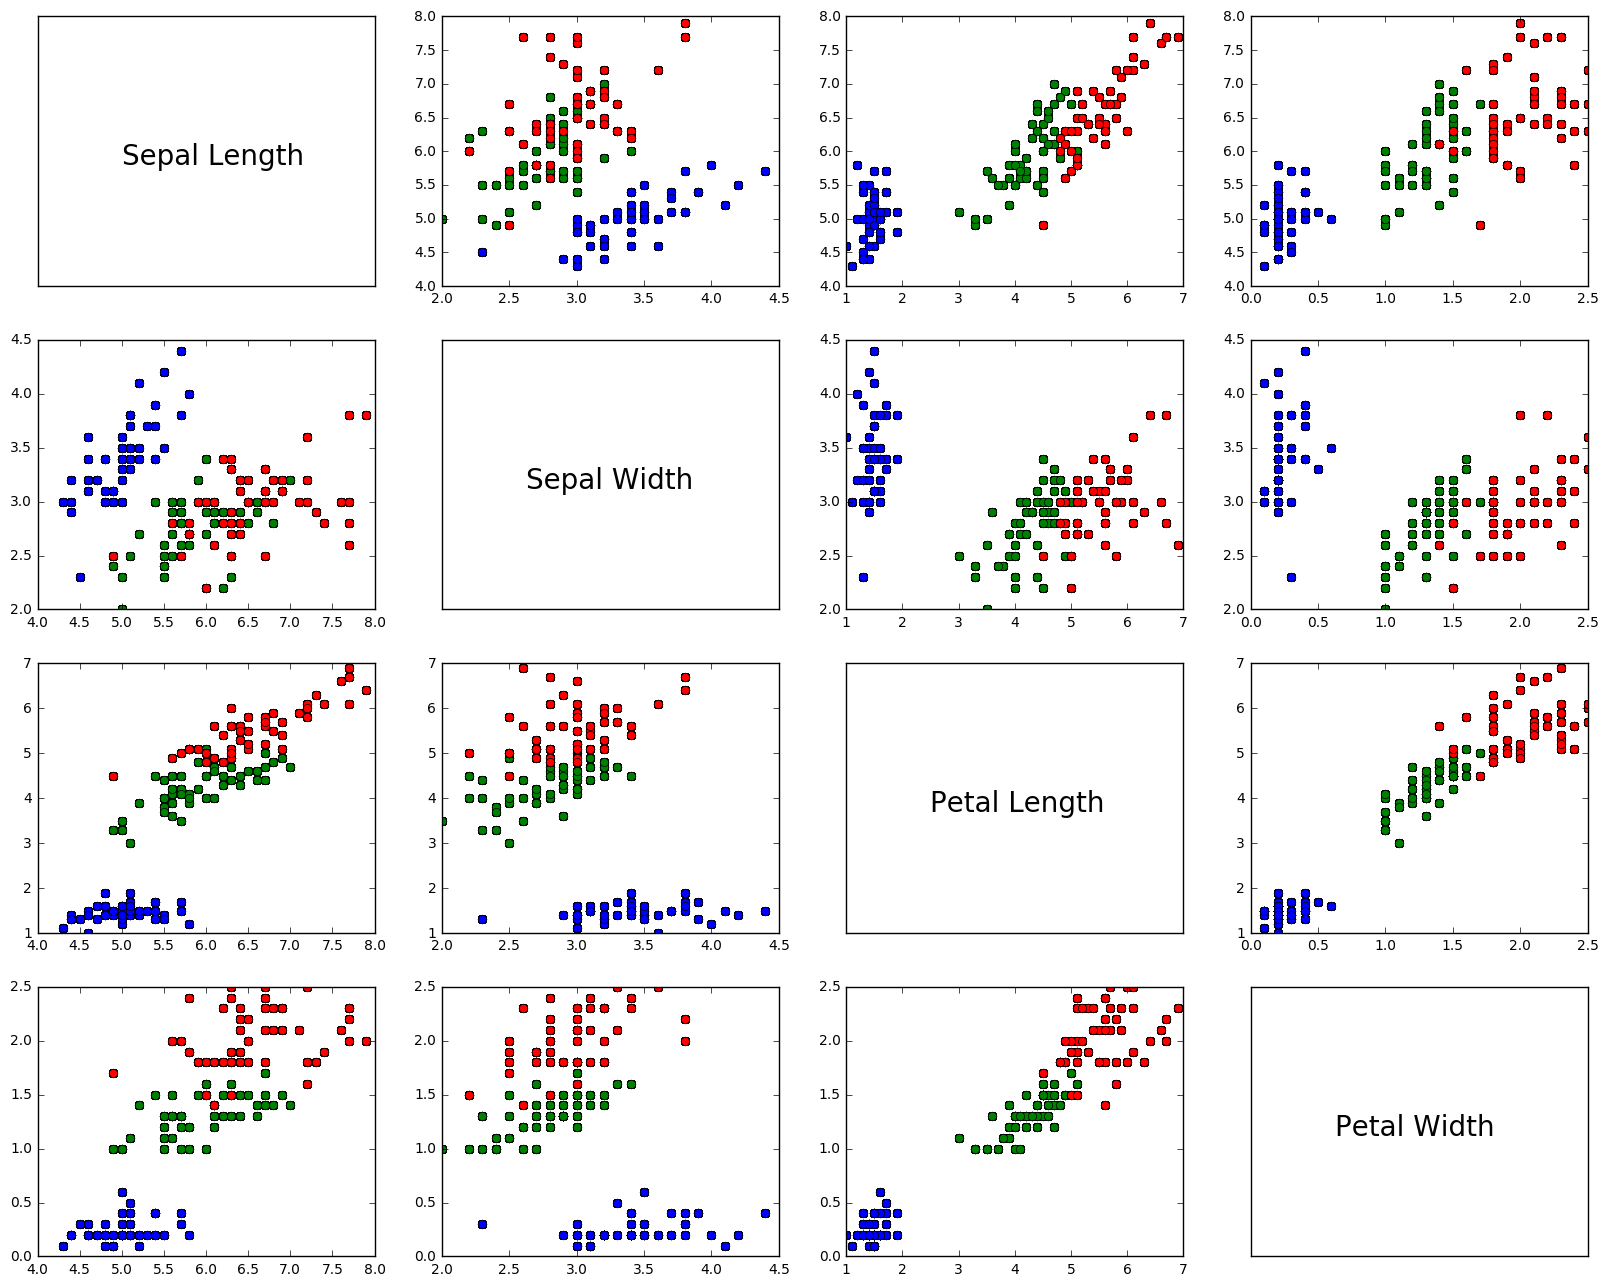

In [5]:
pairs(iris)

Next, I'm making the plot of the linear regression models on each pairwise combination of features. I try to follow the style of the above plot, which clearly shows what plot is generated by which two features. After the linear regression models plot, I will have another plot showing the statistics of each model, in the same plot style.

In [73]:
import numpy as np
from sklearn import datasets, linear_model
from decimal import Decimal
iris_dataset = datasets.load_iris()

# Get data for each feature
sepal_length_data = iris_dataset.data[:, np.newaxis, 0]
sepal_width_data = iris_dataset.data[:, np.newaxis, 1]
petal_length_data = iris_dataset.data[:, np.newaxis, 2]
petal_width_data = iris_dataset.data[:, np.newaxis, 3]
feature_dict = {'sepal_length': sepal_length_data, 'sepal_width': sepal_width_data, 'petal_length': petal_length_data, 'petal_width': petal_width_data}

In [74]:
def iris_linear_regression_2(data, text_list):
    i = 1
    figure = pl.figure(figsize=(5*4, 4*4))
    for feature1 in feature_dict.keys():
        for feature2 in feature_dict.keys():
            ax = pl.subplot(4, 4, i)
            if feature1 == feature2:
                ax.text(2.5, 4.5, feature1, style='normal', fontsize=20, weight='bold')
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
                text_list.append(feature1)
            else:
                X = feature_dict[feature1]
                Y = feature_dict[feature2]
                X_train = X[:-20]
                X_test = X[-20:]
                Y_train = Y[:-20]
                Y_test = Y[-20:]
                regr = linear_model.LinearRegression()
                regr.fit(X_train, Y_train)
                
                # Model statistics are saved in text_list, which will be used in the
                # data plot later.
                text = 'X=' + feature1 + ',\nY=' + feature2 + '\n'
                text += ('Coefficients: '+ str(round(regr.coef_[0][0], 2)) + '\n')
                text += ('Mean squared error: ' + str(round(np.mean((regr.predict(X_test) - Y_test) ** 2), 2)) + '\n')
                text += ('Variance score: ' + str(round(regr.score(X_test, Y_test), 2)))
                text_list.append(text)
                
                pl.scatter(X_test, Y_test,  color='black')
                pl.plot(X_test, regr.predict(X_test), color='blue', linewidth=3)

                pl.xticks(())
                pl.yticks(())
            i += 1

    pl.show()

In [52]:
def iris_linear_regression_data(text_list):
    i = 1
    j = 0
    figure = pl.figure(figsize=(5*4, 4*4))
    while j < len(text_list):
        ax = pl.subplot(4, 4, i)
        if j % 5 == 0:
            ax.text(2.5, 4.5, text_list[j], style='normal', fontsize=20, weight='bold')
            ax.axis([0, 10, 0, 10])
            pl.xticks([]), pl.yticks([])
        else:
            ax.text(0.5, 3, text_list[j], style='normal', fontsize=18)
            ax.axis([0, 10, 0, 10])
            pl.xticks([]), pl.yticks([])
        i += 1
        j += 1

    pl.show()

** Plot 2, Linear regression models generated on each pairwise combination of feature. **

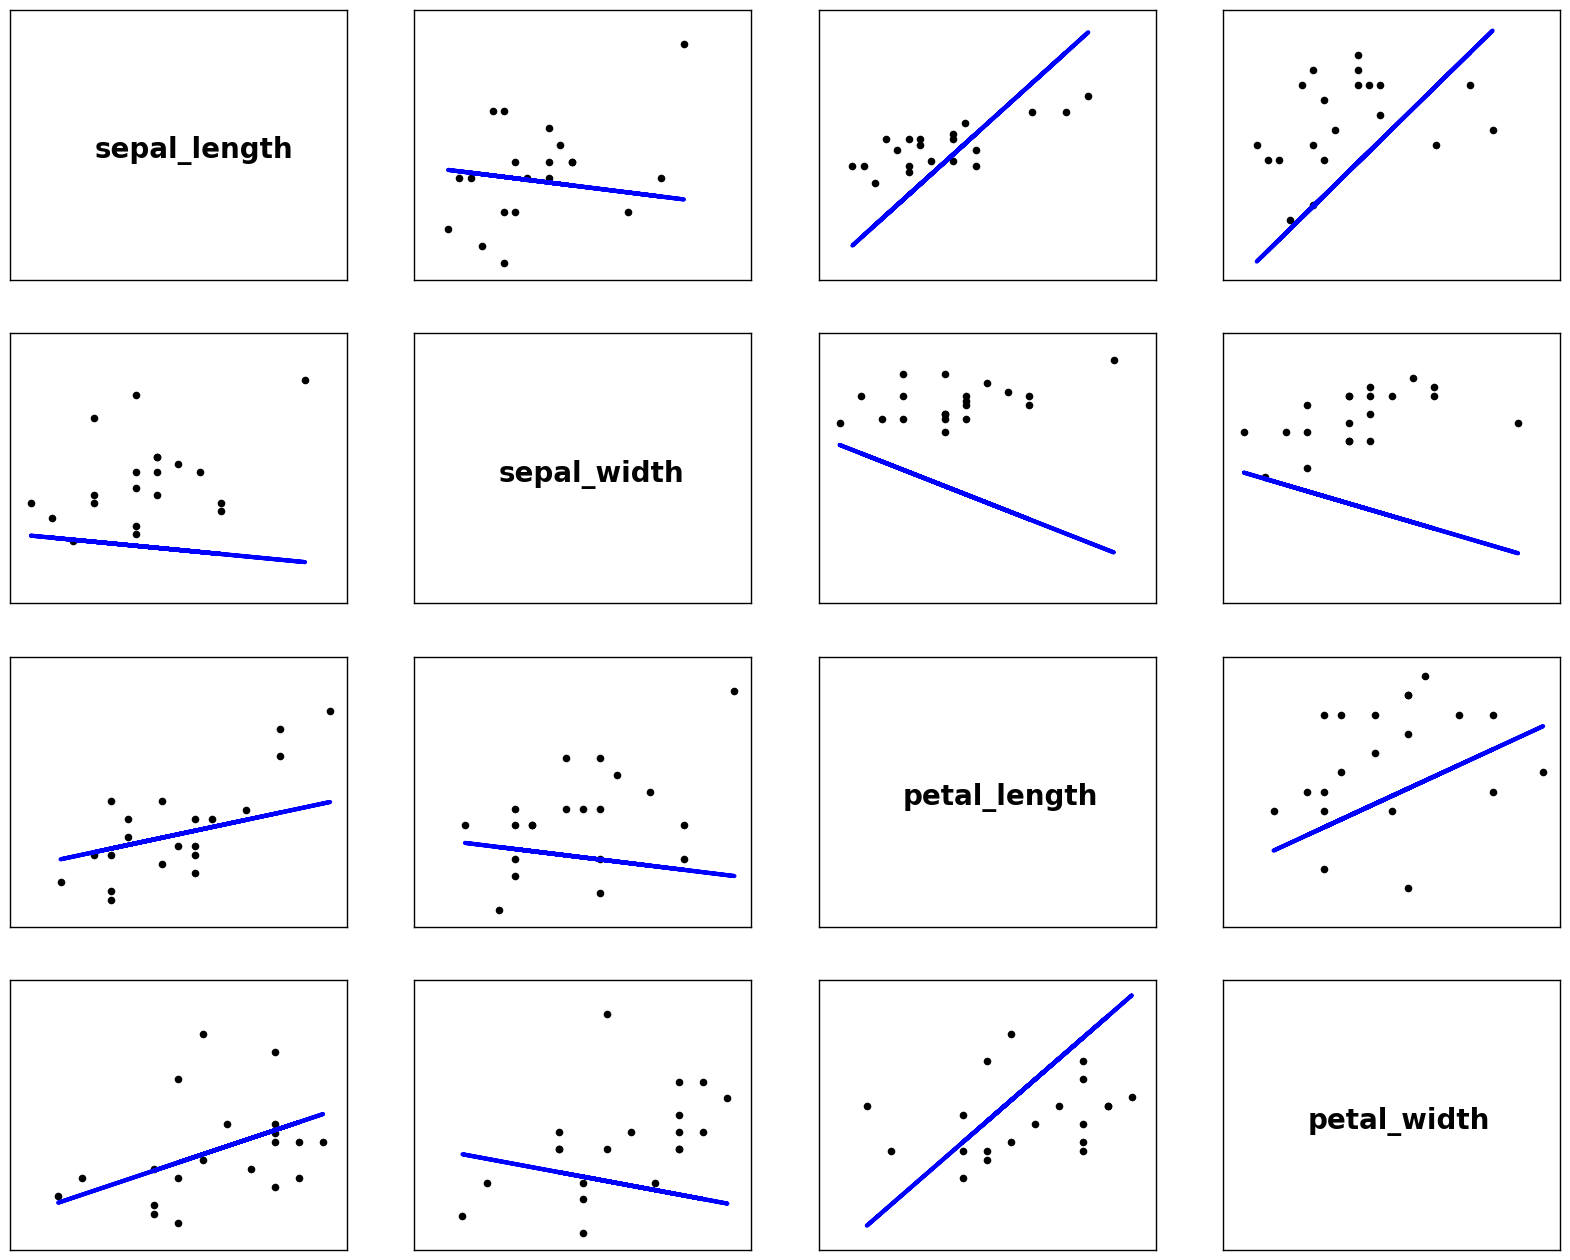

In [53]:
text_list = []
iris_linear_regression_2(iris, text_list)

** Plot 3, Model statistics for model generated by each pairwise combination of feature. **

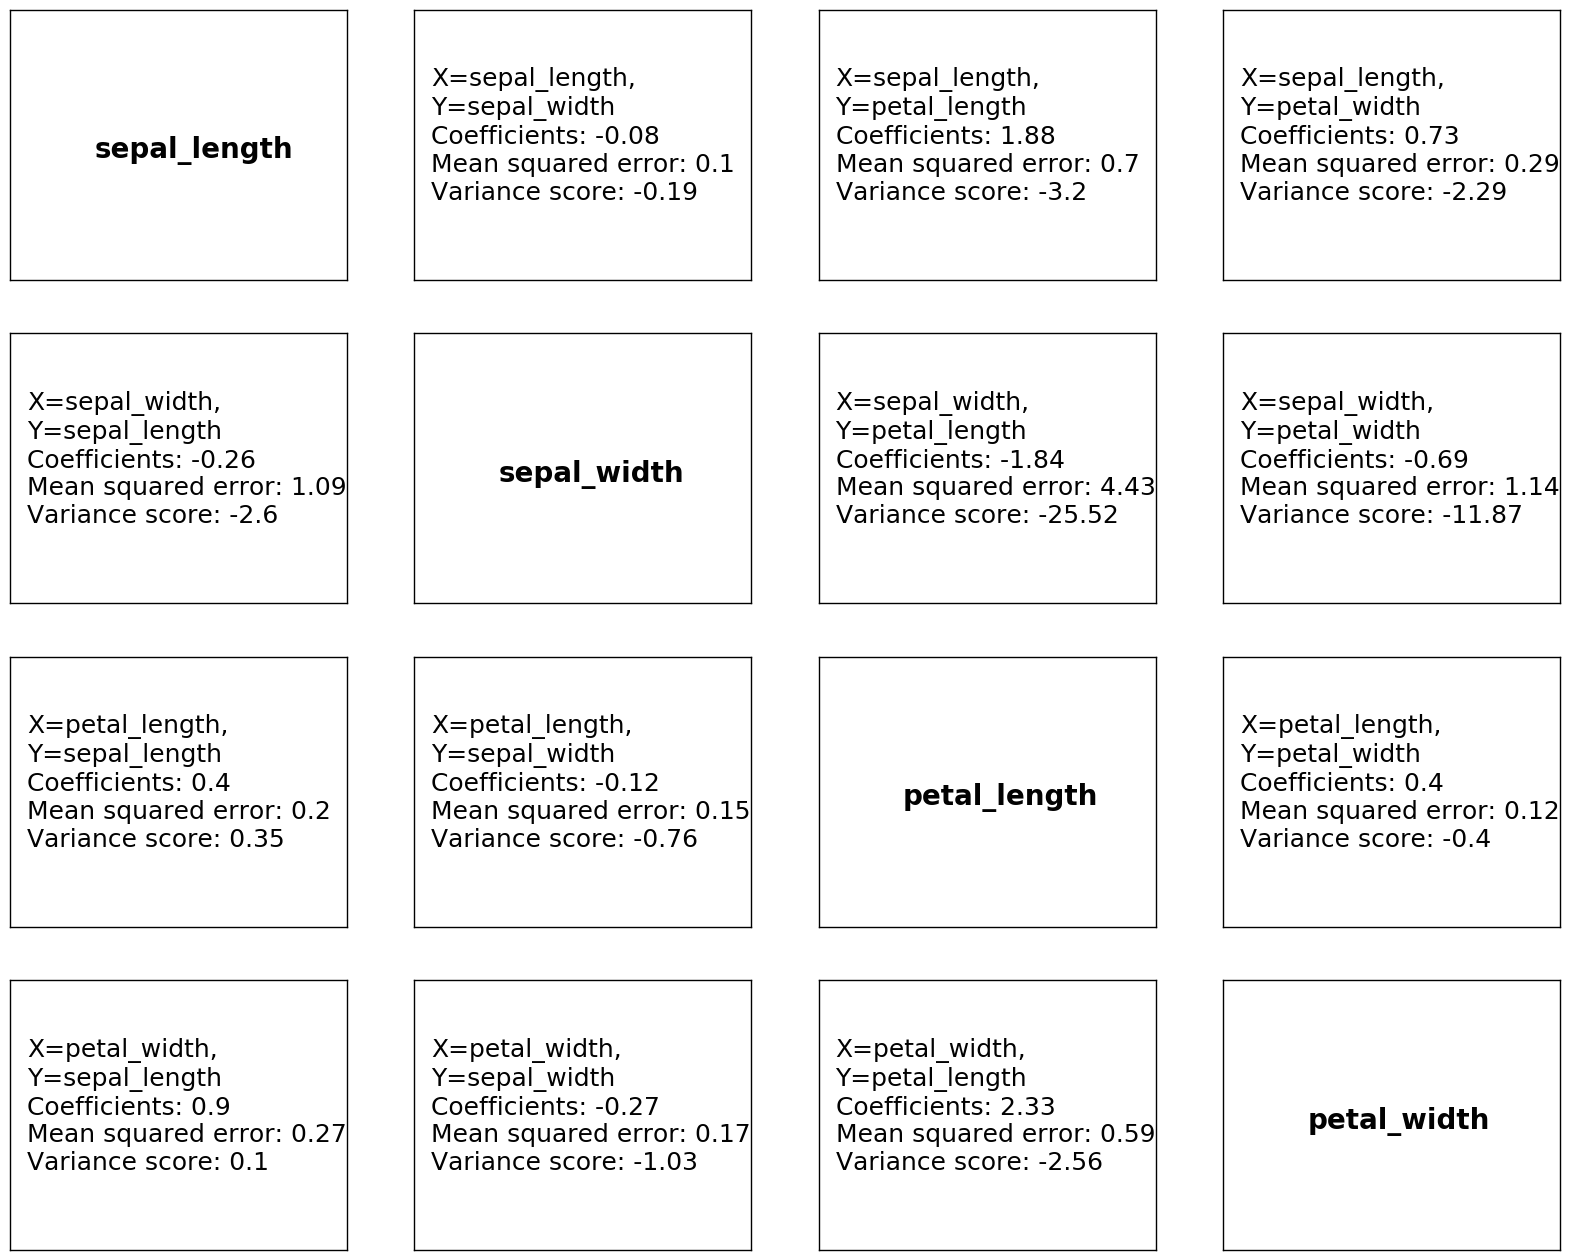

In [54]:
iris_linear_regression_data(text_list)

### Choose the best overall linear regression model

Now I want to play around with the features, try different combinations of multiple features predicting a single feature. If I number the features with numbers:

In [22]:
feature_indice = {0: 'sepal_length', 1: 'sepal_width', 2: 'petal_length', 3: 'petal_width'}

There will be different combinations, for example, feature 0 and 1 predicting 2, feature 0 and 1 predicting 3, etc. I listed all the possible combinations in a list:

In [25]:
feature_combos = [((0, 1), 2), ((0, 1), 3), ((0, 2), 1), ((0, 2), 3), ((0, 3), 1), ((0, 3), 2),
                  ((1, 2), 0), ((1, 2), 3), ((1, 3), 0), ((1, 3), 2), ((2, 3), 0), ((2, 3), 1),
                  ((0, 1, 2), 3), ((0, 2, 3), 1), ((0, 1, 3), 2), ((1, 2, 3), 0)]

Now I want to write a function to compute the model statistics for all the combinations above. Before that I picked the statistics evaluating the perfomance of each model:
* Variance Score
  
  It is computed with regr.score(X_test, Y_test). According to scikit learn documentation, score(X, Y) = 1-u/v, where u is the regression sum of squares ((y_true - y_pred) \** 2).sum() and v is the residual sum of squares ((y_true - y_true.mean()) \** 2).sum(). The closer the variance score is to 1, the better perfomance of the model.
  
  
* Mean Squared Error

  It computes the mean of the difference between predicted Y and the actual Y. It shows how well our model is predicting. The closer the value is to 0, the better. 


Next I am writing a function to calcaulte the model statistics for each feature combinations.

In [30]:
def multiple_features_fitting(indice):
    '''
    Input: An array of tuples. The tuple consists of the indices of multiple features and 
           a single feature that needs to be predicted. 
    Output: An dictionary, with the key being the input tuple, and the value being the 
            model statistic of the input tuple. 
    '''
    result = {}
    for pair in indice:
        x_indices = pair[0]
        y_index = pair[1]
        X_train = iris_dataset.data[:-20, x_indices]
        X_test = iris_dataset.data[-20:, x_indices]
        Y_train = (iris_dataset.data[:, np.newaxis, y_index])[:-20]
        Y_test = (iris_dataset.data[:, np.newaxis, y_index])[-20:]
        regr = linear_model.LinearRegression()
        regr.fit(X_train, Y_train)
        variance_score = regr.score(X_test, Y_test)
        mean_squared_error = np.mean((regr.predict(X_test) - Y_test) ** 2)
        result[pair] = (variance_score, mean_squared_error)
    return result

In [27]:
multiple_features_fitting(feature_combos)

{((0, 1), 2): (-2.828658120697491, 0.63890732389139393),
 ((0, 1), 3): (-2.5644530059452468, 0.31536497970100563),
 ((0, 1, 2), 3): (-0.29743907679703252, 0.11479092231961743),
 ((0, 1, 3), 2): (-0.69572250813957814, 0.28297369354579216),
 ((0, 2), 1): (-0.46829459837019449, 0.12667711647438851),
 ((0, 2), 3): (-0.46206576704088148, 0.12935626873894196),
 ((0, 2, 3), 1): (-0.4323413855270144, 0.12357525303634316),
 ((0, 3), 1): (-1.2180630692366825, 0.19136339129839475),
 ((0, 3), 2): (-1.745373492744795, 0.45813420160178769),
 ((1, 2), 0): (0.48651757527160305, 0.15531559641972198),
 ((1, 2), 3): (-0.31683065736476151, 0.11650659241034725),
 ((1, 2, 3), 0): (0.36671331841150701, 0.19155338901347954),
 ((1, 3), 0): (0.047390710568918963, 0.28814049482066639),
 ((1, 3), 2): (-2.052986982918902, 0.5094672027745919),
 ((2, 3), 0): (0.17974045454381027, 0.24810800601186114),
 ((2, 3), 1): (-0.44224579065360081, 0.1244297555886394)}

The values of the above dictionary is are tuples, in the format of (variance_score, mean_squared_error). Since we want variance_score to be as close to 1, and mean_squared_error to be as close to 0, the feature tuple with the best model statistics is -- ((1, 2, 3), 0): (0.36671331841150701, 0.19155338901347954). 

Below I am making the plot of this feature combination. The data is 4 dimension. In the plot below, three variables are on the axis and the fourth (sepal_length) being color.

In [71]:
x_indices = (1, 2, 3)
y_index = 0
X_train_new = iris_dataset.data[:-20, x_indices]
X_test_new = iris_dataset.data[-20:, x_indices]
Y_train_new = (iris_dataset.data[:, np.newaxis, y_index])[:-20]
Y_test_new = (iris_dataset.data[:, np.newaxis, y_index])[-20:]
regr = linear_model.LinearRegression()
regr.fit(X_train_new, Y_train_new)
print ("Coefficients: \n", regr.coef_)
print ("Residual sum of squares : %.2f" % np.mean((regr.predict(X_test_new) - Y_test_new) ** 2))
print ("Variance score: %.2f" % regr.score(X_test_new, Y_test_new))

Coefficients: 
 [[ 0.65860695  0.79197923 -0.77296811]]
Residual sum of squares : 0.19
Variance score: 0.37


** Plot 4, Plot of the best overall linear regression model -- using sepal_width, petal_length and petal_width to predict sepal_length **

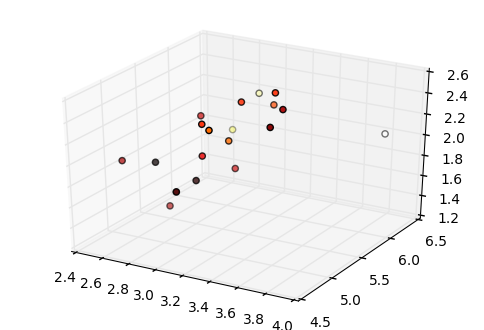

In [75]:
x = X_test_new[:, np.newaxis, 0]
y = X_test_new[:, np.newaxis, 1]
z = X_test_new[:, np.newaxis, 2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=Y_test_new, cmap=plt.hot())
plt.show()

Unfortuantely, this 4D plot is not that intuitive. Unlike the previous plots, this does not have a straight line and we couldn't see how far away the scatterred points are to the line. I hope to find a better way.

### Based upon the linear models you generated, which pair of features appear to be most predictive for one another?

Refer to Plot 3 above, (sepal_length, petal_length) appears to be the most predictive for one another. When having petal_length to predict sepal_length, mean squared error = 0.2, variance score = 0.35. This is pretty good statistics, better compared to other pairs. When having sepal_length to predict petal_length, mean squared error = 0.7, variance score = -3.2. This is slightly worse, but still can be viewed as good performance.

### Suppose you tried to generate a classification model on this dataset, but only after removing the feature that you were best able to predict based upon other features. How would removing this feature affect the classification performance?

If only after removing a feature makes the prediction the best, this feature is not making a positive impact on the model prediction. Therefore, removing this feature has improved the classification performance.  